In [2]:
#This program is from Minibarch gradient descent
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#generate the data set
#Generate X data of size(2,1)
X=3*np.random.rand(10,1)
#Genate Y data set
Y=4+3*X+np.random.randn(10,1)

In [5]:
X

array([[2.4699959 ],
       [1.66493966],
       [1.09873712],
       [1.45276572],
       [0.91717844],
       [1.41071236],
       [0.05478935],
       [0.86315641],
       [0.93059603],
       [0.60299532]])

In [11]:
X_b=np.c_[np.ones((10,1)),X]

In [12]:
X_b

array([[1.        , 2.4699959 ],
       [1.        , 1.66493966],
       [1.        , 1.09873712],
       [1.        , 1.45276572],
       [1.        , 0.91717844],
       [1.        , 1.41071236],
       [1.        , 0.05478935],
       [1.        , 0.86315641],
       [1.        , 0.93059603],
       [1.        , 0.60299532]])

In [13]:
Y

array([[11.02163601],
       [ 7.56444118],
       [ 7.72705108],
       [ 7.39459661],
       [ 6.35104263],
       [ 8.16470485],
       [ 4.1866383 ],
       [ 4.78553308],
       [ 6.50507059],
       [ 7.46999461]])

In [23]:
#Compute the mini batch gradient size
n_iterations=20
mini_batch_size=2
#Set the seed values
np.random.seed(42)
#Initialize the random theta values
theta=np.random.randn(2,1)


theta_path_mgd = []

t0,t1=10,1000
def learning_schedule(t):
    return(t0)/(t+t1)
    
t=0
for epoch in range(n_iterations):
    #print("Iteration number",epoch)
    #Generate shuffled indices
    shuffled_indices=np.random.permutation(len(X_b))
    #Geenrate the shuffled indices of X
    X_b_shuffled=X_b[shuffled_indices]
    #Generate the shuffled index of Y
    Y_shuffled=Y[shuffled_indices]
    for i in range(0,len(X_b),mini_batch_size):
        #To vary the learning rate
        t+=1
        #take a mini bact size from input
        xi=X_b_shuffled[i:i+mini_batch_size]
        #take the same size o outout
        yi=Y_shuffled[i:i+mini_batch_size]
        #caluclate the gradients
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        #retrieve the learning rate..for every iteration,the learning rate reduces
        eta=learning_schedule(t)
        #chaneg the theta paramater
        theta=theta-eta*gradients
        #append the thetav values
        theta_path_mgd.append(theta)
        
        
    

In [24]:
theta

array([[3.57915513],
       [3.01606342]])

In [26]:
theta_path_mgd

[array([[0.77953935],
        [0.15280356]]), array([[1.08788277],
        [0.74285402]]), array([[1.3242105 ],
        [1.04002071]]), array([[1.4699098],
        [1.1926174]]), array([[1.59077543],
        [1.30101493]]), array([[1.78801071],
        [1.67483966]]), array([[1.89685481],
        [1.76891416]]), array([[2.00705777],
        [1.91038167]]), array([[2.14746677],
        [2.08606675]]), array([[2.24453813],
        [2.14891469]]), array([[2.36343204],
        [2.29737558]]), array([[2.40565419],
        [2.30670391]]), array([[2.51673446],
        [2.38631541]]), array([[2.59606025],
        [2.55393777]]), array([[2.63800693],
        [2.60296343]]), array([[2.68618257],
        [2.67389134]]), array([[2.7361924 ],
        [2.72011037]]), array([[2.76110875],
        [2.79107813]]), array([[2.79744464],
        [2.80894758]]), array([[2.89199521],
        [2.8838789 ]]), array([[2.94284301],
        [2.93668631]]), array([[2.95041469],
        [2.9547842 ]]), array([[2.9

In [27]:
theta_path_mgd = np.array(theta_path_mgd)

In [28]:
theta_path_mgd

array([[[0.77953935],
        [0.15280356]],

       [[1.08788277],
        [0.74285402]],

       [[1.3242105 ],
        [1.04002071]],

       [[1.4699098 ],
        [1.1926174 ]],

       [[1.59077543],
        [1.30101493]],

       [[1.78801071],
        [1.67483966]],

       [[1.89685481],
        [1.76891416]],

       [[2.00705777],
        [1.91038167]],

       [[2.14746677],
        [2.08606675]],

       [[2.24453813],
        [2.14891469]],

       [[2.36343204],
        [2.29737558]],

       [[2.40565419],
        [2.30670391]],

       [[2.51673446],
        [2.38631541]],

       [[2.59606025],
        [2.55393777]],

       [[2.63800693],
        [2.60296343]],

       [[2.68618257],
        [2.67389134]],

       [[2.7361924 ],
        [2.72011037]],

       [[2.76110875],
        [2.79107813]],

       [[2.79744464],
        [2.80894758]],

       [[2.89199521],
        [2.8838789 ]],

       [[2.94284301],
        [2.93668631]],

       [[2.95041469],
        [2.9

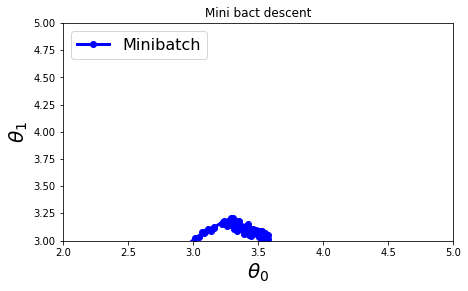

In [29]:
#Plot graph between two parameters
plt.figure(figsize=(7,4))
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"b-o",linewidth=3,label="Minibatch")
plt.legend(loc="upper left",fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$",fontsize=20)
plt.title("Mini bact descent")
plt.axis([2,5,3,5])
plt.show()